In [21]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 31.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 48.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 26.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
df = pd.read_csv('wars.tsv', delimiter='\t')


df['Rank'] = df['End'].rank(ascending=True)
df.set_index('Rank', inplace=True)
df.head()


,War,Start,End,Winner,Loser
Rank,,,,,
1.0,Edwardian Era War (phase of the Hundred Years'...,1337,1360,England,France
2.0,Caroline War (phase of the Hundred Years' War),1369,1389,France,England
3.0,Lancastrian War (phase of the Hundred Years' War),1415,1453,France,England
4.0,Russo-Swedish War,1495,1497,Russia,Sweden
5.0,First Italian War,1494,1498,"France, Venice","Naples, Spain"


In [3]:
from data import alias, CIV_COLORS
from collections import defaultdict

def parse_player(player):
    result = re.split(r'[,()\-]', player)
    for i in range(len(result)):
        if result[i] in alias:
            result[i] = alias[result[i]]
            print(result[i])
    result = [r.strip() for r in result]
    return result

civ_colors = defaultdict(lambda: 'k')
for civ in CIV_COLORS:
    civ_colors[civ] = [x/255 for x in CIV_COLORS[civ]["territory"]]
    
print(civ_colors['Prussia'])

[0.7019607843137254, 0.6941176470588235, 0.7215686274509804]


In [4]:
# Function to calculate the Probability
def probability(rating1, rating2):
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * (rating1 - rating2) / 400))


# Function to calculate Elo rating
def compute_elo_rank(winner_rating, loser_rating, k=30):

    # Expected probability
    Pb = probability(winner_rating, loser_rating)
    Pa = probability(loser_rating, winner_rating)

    winner_diff = k * (1 - Pa)
    loser_diff = k * (0 - Pb)
    return winner_diff, loser_diff 



In [5]:
from collections import defaultdict
import math
ratings = defaultdict(lambda: 1200)
play_time_rating = defaultdict(defaultdict)
print(ratings['England'])

1200


In [6]:
import re


for index, row in df.iterrows():
    # Access the values in each column
    war = row['War']
    end = row['End']
#     print(row['Winner'])
    winners = parse_player(row['Winner'])
    losers = parse_player(row['Loser'])

    
    winner_rating = sum(ratings[w] for w in winners) / len(winners)
    loser_rating = sum(ratings[l] for l in losers) / len(losers)
    # ...
    # Call the compute_elo_rank function with the values from the row
    winner_diff, loser_diff = compute_elo_rank(winner_rating, loser_rating)
    
    for w in winners:
        ratings[w] += winner_diff
        play_time_rating[w][end] = ratings[w]
    for l in losers:
        ratings[l] += loser_diff
        play_time_rating[l][end] = ratings[l]
    
#     print(winners+losers)
#     if 'Sardinia' in winners+losers:
#         print(f'{war}\t{end}\t')
#         print(f'Sardinia\t{ratings["Sardinia"]}')
        

Austria
Austria
Austria
Austria
Austria
England
England
England
England
England
England
England
Prussia
Sardinia
Prussia


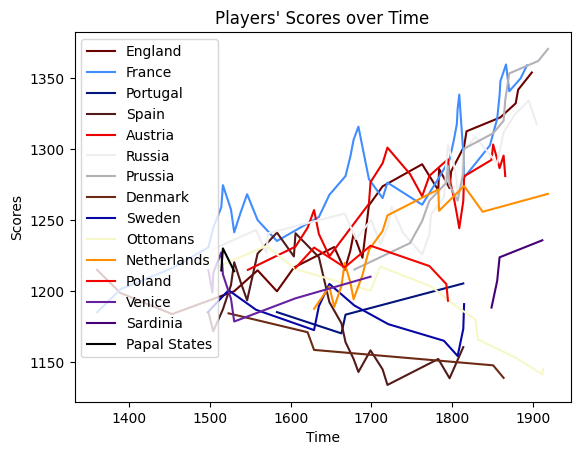

In [7]:
import matplotlib.pyplot as plt



for p in ['England', 'France', 'Portugal', 'Spain', 'Austria', 'Russia', \
          'Prussia', 'Denmark', 'Sweden', 'Ottomans', 'Netherlands', 'Poland',\
         'Venice', 'Sardinia', 'Papal States']:
    # Plotting Player 1

    sorted_dict = {k: play_time_rating[p][k] for k in sorted(play_time_rating[p])}
#     print(p, sorted_dict)
    plt.plot(sorted_dict.keys(), sorted_dict.values(), label=p, color=civ_colors[p])

plt.xlabel('Time')
plt.ylabel('Scores')
plt.title('Players\' Scores over Time')



# Add a legend
plt.legend()

# Show the plot
plt.show()